# Choosing location for an oil well

Oil samples were provided in three regions: in each 10,000 fields, where the quality of oil and the volume of its reserves were measured. It is necessary to build a machine learning model that will help determine the region where mining will bring the greatest profit. \
\
Steps to choose a location:
- In the selected region, they are looking for deposits, for each, the values of the signs are determined;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected fields.

## Loading and preparing data

Let's import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

from numpy.random import RandomState

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import warnings

In [2]:
warnings.filterwarnings('ignore')

Let's download datasets

In [3]:
try:
    data_region1 = pd.read_csv('datasets/geo_data_0.csv')
    data_region2 = pd.read_csv('datasets/geo_data_1.csv')
    data_region3 = pd.read_csv('datasets/geo_data_2.csv')
except:
    data_region1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_region2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_region3 = pd.read_csv('/datasets/geo_data_2.csv')

Let's discover data

### Useful functions

In [4]:
def print_dupl(data):
    print(f'id: {data.duplicated(subset=["id"]).sum()}')
    print(f'f0: {data.duplicated(subset=["f0"]).sum()}')
    print(f'f1: {data.duplicated(subset=["f1"]).sum()}')
    print(f'f2: {data.duplicated(subset=["f2"]).sum()}')

### Region 1

In [5]:
data_region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_region1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


### Region 2

In [7]:
data_region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_region2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


### Region 3

In [9]:
data_region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_region3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Let's check duplicates

### Region 1

In [11]:
data_region1.duplicated().sum()

0

In [12]:
print_dupl(data_region1)

id: 10
f0: 0
f1: 0
f2: 0


In [13]:
data_region1 = data_region1.drop_duplicates(subset=['id'])

### Region 2

In [14]:
data_region2.duplicated().sum()

0

In [15]:
print_dupl(data_region2)

id: 4
f0: 0
f1: 0
f2: 0


In [16]:
data_region2 = data_region2.drop_duplicates(subset=['id'])

### Region 3

In [17]:
data_region3.duplicated().sum()

0

In [18]:
print_dupl(data_region3)

id: 4
f0: 0
f1: 0
f2: 0


In [19]:
data_region3 = data_region3.drop_duplicates(subset=['id'])

Chech the data for correctness. We are only interested in one feature – **product**

### Useful functions

In [20]:
def display_struct_data(data):
    min_value = data['product'].describe()['min']
    max_value = data['product'].describe()['max']
    mean_value = data['product'].describe()['mean']
    median_value = data['product'].describe()['50%']
    
    plt.ylim(min_value, max_value)
    data.boxplot(column='product', figsize=(3, 3))
    print(f'Mean = {mean_value}')
    print(f'Median = {median_value}')

### Region 1

Mean = 92.49968421774328
Median = 91.84792790724278


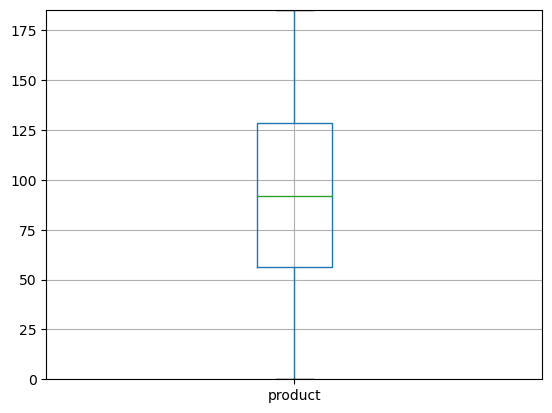

In [21]:
display_struct_data(data_region1)

### Region 2

Mean = 68.82391591806625
Median = 57.08562464628662


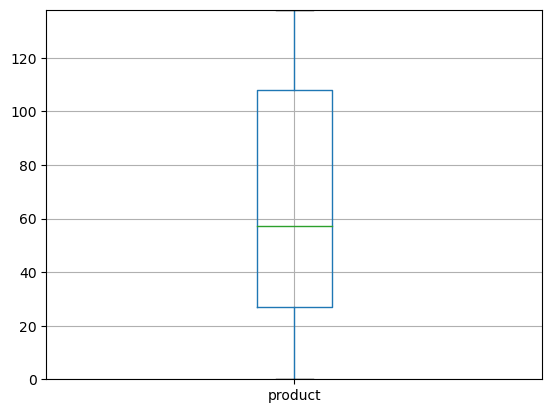

In [22]:
display_struct_data(data_region2)

### Region 3

Mean = 94.99834211933415
Median = 94.92502617656251


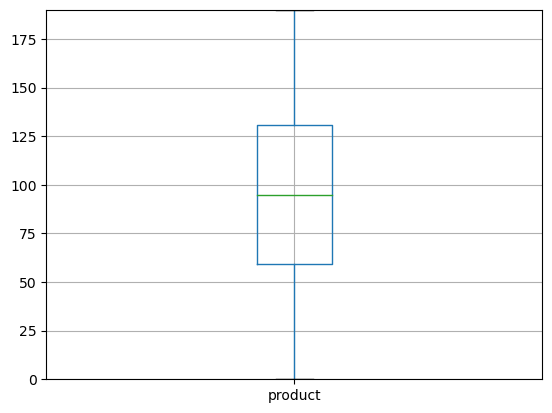

In [23]:
display_struct_data(data_region3)

**Conclusion:** No outbursts are observed, it is worth noting that there are many small wells in the second region.

## Train and validate the model

To train on the data of each region, we will use the LinearRegression

### Useful functions

In [24]:
def train_sample(data, model):
    dict_metrics = {}
    
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaler = scaler.transform(features_train)
    features_valid_scaler = scaler.transform(features_valid)
    
    model.fit(features_train_scaler, target_train)
    predict_valid = model.predict(features_valid_scaler)
    mse = mean_squared_error(target_valid, predict_valid)
    dict_metrics['mse'] = mse
    rmse = mse ** 0.5
    dict_metrics['rmse'] = rmse
    r2 = r2_score(target_valid, predict_valid)
    dict_metrics['r2'] = r2
    mean_product = predict_valid.mean()
    dict_metrics['mean_product'] = mean_product
    
    return dict_metrics, predict_valid, target_valid

### Region 1

In [25]:
model_1 = LinearRegression()
metrics_1, predict_valid_1, target_valid_1 = train_sample(data_region1, model_1)
print(metrics_1)

{'mse': 1432.8895312377324, 'rmse': 37.853527328872964, 'r2': 0.2723923460817068, 'mean_product': 92.78915638280621}


### Region 2

In [26]:
model_2 = LinearRegression()
metrics_2, predict_valid_2, target_valid_2 = train_sample(data_region2, model_2)
print(metrics_2)

{'mse': 0.7957697318650333, 'rmse': 0.8920592647717042, 'r2': 0.9996222988190184, 'mean_product': 69.1783195703043}


### Region 3

In [27]:
model_3 = LinearRegression()
metrics_3, predict_valid_3, target_valid_3 = train_sample(data_region3, model_3)
print(metrics_3)

{'mse': 1606.0738119304278, 'rmse': 40.07585073246016, 'r2': 0.19556241810202346, 'mean_product': 94.86572480562035}


#### Conclusion
The third region is the most profitable **(mean = 94.86)**, but the third model showed a high level of inaccuracy – **rmse = 40.07**. 
\
On the contrary, the second region is the least profitable **(mean = 69.17)**, but the second model showed a high level of accuracy – **rmse = 0.89**

## Preparation for profit calculation

### General information

- Budget for well development in the region: **10 000 000 000 ₽**
- In the region are researching: **500**
- Choosing: **200**
- Price per barrel: **450 ₽**
- Price for one unit of production: **450 000 ₽**

In [28]:
INVESTMENTS = 10000000000 
COST = 450000
COUNT_POINTS = 200
COST_PER_POINT = INVESTMENTS / COUNT_POINTS
TOTAL_POINTS = 500

Calculate breakeven point and compare with regions

In [29]:
MIN_PRODUCT = round(COST_PER_POINT / COST, 2)
print('Minimum product in each point:', MIN_PRODUCT)

Minimum product in each point: 111.11


### Region 1

In [30]:
print('Mean product:', round(data_region1['product'].mean(), 2))
print('Minimum product in each point:', MIN_PRODUCT)

Mean product: 92.5
Minimum product in each point: 111.11


### Region 2

In [31]:
print('Mean product:', round(data_region2['product'].mean(), 2))
print('Minimum product in each point:', MIN_PRODUCT)

Mean product: 68.82
Minimum product in each point: 111.11


### Region 3

In [32]:
print('Mean product:', round(data_region3['product'].mean(), 2))
print('Minimum product in each point:', MIN_PRODUCT)

Mean product: 95.0
Minimum product in each point: 111.11


**Conclusion:** Each region has on average less oil than we need

## Profit and Loss Calculation

In [33]:
type(target_valid_2)

pandas.core.series.Series

In [34]:
type(predict_valid_2)

numpy.ndarray

In [35]:
target_valid_2.index

Int64Index([71748, 80490,  2655, 71171, 91141,  9539,  8482, 76069, 66390,
            61531,
            ...
            89694, 84114, 26033, 99399, 12581, 18456, 73032, 54710, 50911,
            46409],
           dtype='int64', length=24999)

In [36]:
predict_new = pd.Series(predict_valid_2)
predict_new.index = target_valid_2.index
len(predict_new.index)

24999

### Profit calculation function

In [37]:
def revenue(target, predict):
    predict_sort = predict.sort_values(ascending=False)
    target_selected = target[predict_sort.index][:COUNT_POINTS]
    total_revenue = COST * target_selected.sum() - INVESTMENTS
    return total_revenue

### Apply Bootstrap

In [38]:
state = RandomState(26432)

In [39]:
def metrics_bootstrap(target, predict):
    predict = pd.Series(predict)
    predict.index = target.index
    values = []
    for i in range(1000):
        target_sample = target.sample(n=TOTAL_POINTS, replace=True, random_state=state)
        predict_sample = predict[target_sample.index]
        values.append(revenue(target_sample, predict_sample))
        
    values = pd.Series(values)
    revenue_mean = round(values.mean(), 2)
    min_int = round(values.quantile(0.025), 2)
    max_int = round(values.quantile(0.975), 2)
    risk_of_loss = round((values < 0).mean() * 100, 2)

    print(f'Average profit of the region: {revenue_mean}')
    print(f'Risk of loss of the region: {risk_of_loss}%')
    print(f'Confidence interval of the region: from {min_int} to {max_int}')
    
    

### Region 1

In [40]:
metrics_bootstrap(target_valid_1, predict_valid_1)

Average profit of the region: 422879148.77
Risk of loss of the region: 6.5%
Confidence interval of the region: from -118282530.26 to 947785727.26


### Region 2

In [41]:
metrics_bootstrap(target_valid_2, predict_valid_2)

Average profit of the region: 527863210.14
Risk of loss of the region: 0.7%
Confidence interval of the region: from 126692635.27 to 959380461.6


### Region 3

In [42]:
metrics_bootstrap(target_valid_3, predict_valid_3)

Average profit of the region: 364485249.47
Risk of loss of the region: 9.2%
Confidence interval of the region: from -142553732.25 to 937185806.38


### Conclusion

We chose Region 2, because the risk of loss is the lowest = **0.9%** and average profit is biggest = **541 337 000 ₽**